In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

In [2]:
# Set parameters

# size of grid in x-space
numx = 5000
dx = 1

# courant number
cour = 0.5

# speed at each point in x-space
v=np.ones(numx)*1

# calculate size of t grid
dt = cour*dx/v.max()
numt = int(numx*dt)

print(dx, dt, numx, numt)

1 0.5 5000 2500


In [15]:
def I(x, loc):
    # sets the initial wave --> u(x,0)=I(x)
    return np.exp(-(x-loc)**2/100)

def V(x, loc):
    # returns the initial time derivative of the wave --> u_t(x,0) = V(x)
    return v*(x-loc)*np.exp(-(x-loc)**2/100)/50

def finite_diff(n, C, wavegrid):
    # use finite differences to get the wave at t=2 on
    
    for i in range(wavegrid.shape[1]-1):
        wavegrid[n+1][i] = -wavegrid[n-1][i] + 2*wavegrid[n][i] + C[i+1]*C[i+1]*(wavegrid[n][i+1]-2*wavegrid[n][i]+wavegrid[n][i-1])
    
    # print progress
    if n%100==0:
        print(n/numt*100,'% ')
    
    # set boundaries
    wavegrid[n+1][0]=0
    wavegrid[n+1][-1]=0
    
    return
    
def make_pulse(xvals, loc, direction, stationary=False):
    # make a single Gaussian pulse at x=loc
    # direction of travel = 'left' or 'right'
    # returns the wave at t=0 and t=1
    
    q = v**2
    dtdx2 = (dt/dx)**2 
    
    grid0 = I(xvals, loc)
    grid1 = np.zeros(numx)
    
    if direction == 'left':
        V0 = -V(xvals, loc)
    if direction == 'right':
        V0 = V(xvals, loc)
    
    # So for some reason the general, variable coefficinet version is needed to keep the wave stable
    # if I use the more simplified version, the initial wave breaks apart...
    for i in range(numx-1):
        
        if stationary:
            in_brackets = 0.5*(q[i-1]+q[i])*(grid0[i+1]-grid0[i]) - 0.5*(q[i]+q[i+1])*(grid0[i]-grid0[i-1])
        
            grid1[i] = grid0[i]  + (1/2)*dtdx2*in_brackets
        else:
            in_brackets = 0.5*(q[i-1]+q[i])*(grid0[i+1]-grid0[i]) - 0.5*(q[i]+q[i+1])*(grid0[i]-grid0[i-1])
        
            grid1[i] = grid0[i] + V0[i]*dt + (1/2)*dtdx2*in_brackets
        
    return grid0, grid1
    

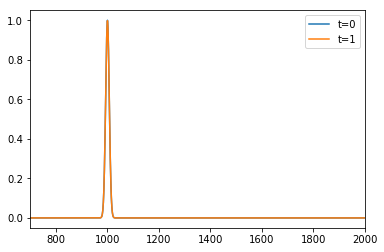

In [26]:
xvals = np.linspace(0,numx-1,numx)
wavegrid = np.zeros((numt, numx))

pulse1 = make_pulse(xvals, 1000, 'right', stationary=True)
#pulse2 = make_pulse(xvals, 1100, 'left')
#pulse3 = make_pulse(xvals, 1200, 'right')
#pulse4 = make_pulse(xvals, 1300, 'left')
#pulse5 = make_pulse(xvals, 1400, 'right')
#pulse6 = make_pulse(xvals, 1500, 'left')
#pulse7 = make_pulse(xvals, 1600, 'right')
#pulse8 = make_pulse(xvals, 1700, 'left')

#wavegrid[0] = pulse1[0] + pulse2[0] + pulse3[0] + pulse4[0] + pulse5[0] + pulse6[0] + pulse7[0] + pulse8[0]
#wavegrid[1] = pulse1[1] + pulse2[1] + pulse3[1] + pulse4[1] + pulse5[1] + pulse6[1] + pulse7[1] + pulse8[1] 

wavegrid[0] = pulse1[0] 
wavegrid[1] = pulse1[1]


%matplotlib inline
plt.plot(wavegrid[0], label='t=0')
plt.plot(wavegrid[1], label='t=1')
plt.legend(loc='best')
plt.xlim(700,2000);

4.0 % 
8.0 % 
12.0 % 
16.0 % 
20.0 % 
24.0 % 
28.000000000000004 % 
32.0 % 
36.0 % 
40.0 % 
44.0 % 
48.0 % 
52.0 % 
56.00000000000001 % 
60.0 % 
64.0 % 
68.0 % 
72.0 % 
76.0 % 
80.0 % 
84.0 % 
88.0 % 
92.0 % 
96.0 % 


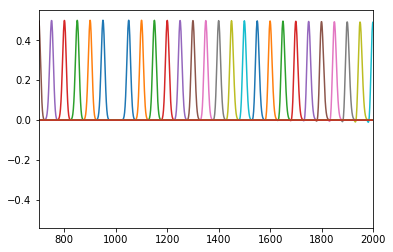

In [27]:
%matplotlib inline

for n in range(2,wavegrid.shape[0]-1):
    
    finite_diff(n-1, v*dt/dx, wavegrid)

    if n%100 ==0:
        plt.xlim(700,2000);
        plt.plot(wavegrid[n])

<IPython.core.display.Javascript object>


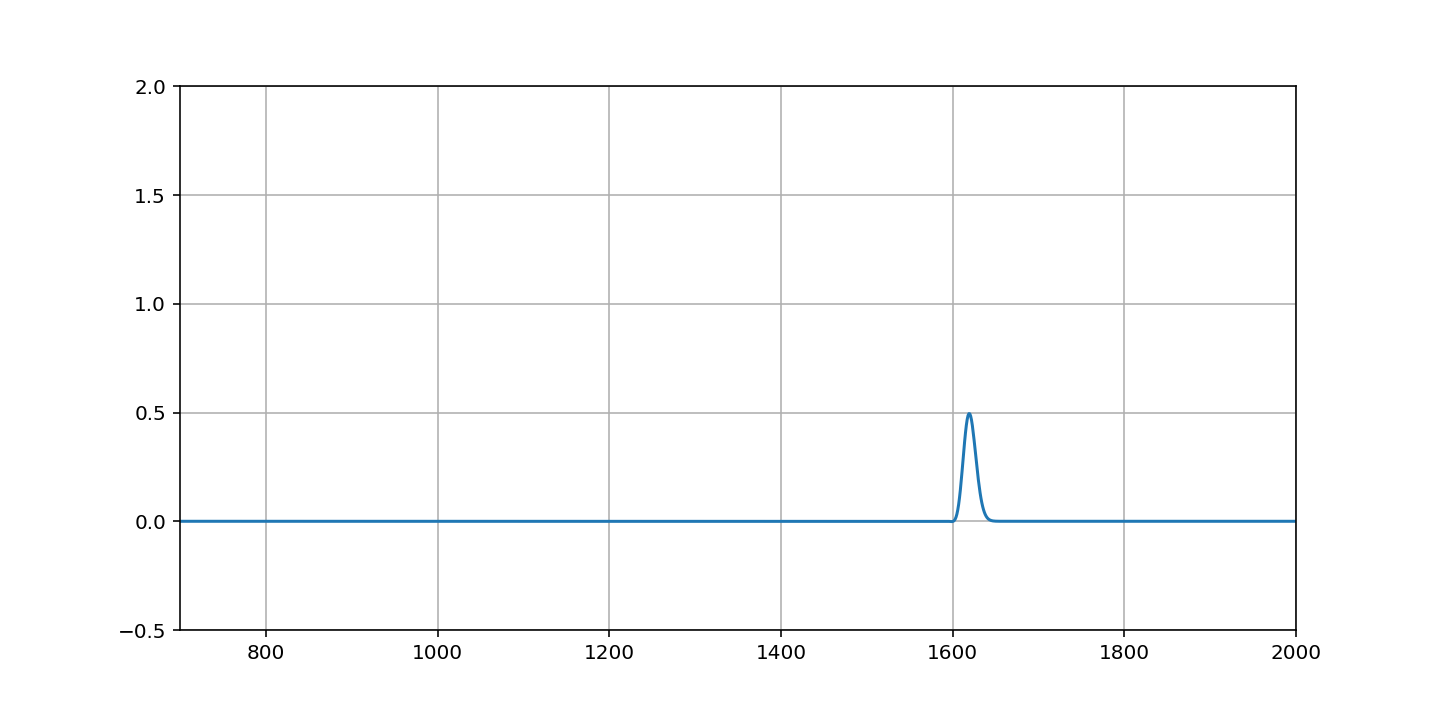

In [39]:
%matplotlib notebook
fig, ax = plt.subplots(figsize=(10,5))

x = np.arange(wavegrid.shape[1])
line, = ax.plot(x, wavegrid[0])

plt.xlim(700,2000);
plt.ylim(-0.5, 2)
plt.grid('on')

def animate(i):
    line.set_ydata(wavegrid[i])  # update the data
    return line,

def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, numt), init_func=init,
                              interval=2, blit=True)

saving = False
if saving:
    plt.rcParams['animation.ffmpeg_path'] = '/Users/becky/anaconda/bin/ffmpeg'
    FFwriter = animation.FFMpegWriter(fps=60)
    print("Saving")
    ani.save('superposition.mp4', writer=FFwriter, dpi=100)
    print("Saved")
    
plt.show()